# Dataset analysis

In [2]:
cd /mnt/sda/otani/Experiments/moment_retrieval/

/mnt/sda/otani/Experiments/moment_retrieval


In [10]:
%matplotlib inline
from typing import List
import json
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
from src.toolbox.utils import _nms, sentence2token
from src.toolbox.eval import evaluate, location_error, accumulate_metrics, categorize_results, summarize_results_per_class
from src.toolbox.visualization import plot_performance_per_class
from src.toolbox.data_converters import Charade2Instances
from src.toolbox.baseline import SegmentGeneratorKDE, predict
import seaborn as sns
import pickle as pkl

In [5]:
test_data = Charade2Instances(pd.read_csv('data/processed/test.csv'))

In [7]:
def get_key_tokens(sentences: List[str]):
    simplified_sentences = []

    for i, sentence in enumerate(sentences):
        key_tokens = sentence2token(sentence)
        simplified_sentences.append(key_tokens)
        
    return simplified_sentences

sentences = [query[1] for query, _ in test_data]
simplified_sentences = get_key_tokens(sentences)

top-30 actions cover 92.7% of all actions


Text(0.7, 0.8, 'Charade-STA')

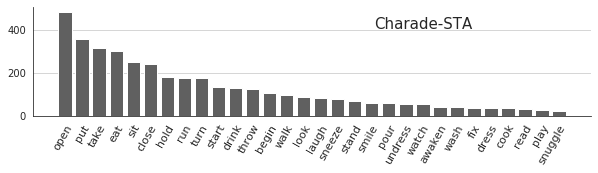

In [8]:
from collections import Counter

verbs = sum([x[0] for x in simplified_sentences], [])
verb_c = Counter(verbs)
k = 30

counts = [v for _, v in verb_c.most_common(k)]
top_actions = [k for k, _ in verb_c.most_common(k)]
sns.set_style("white")
plt.figure(figsize=(10, 2))
plt.bar(range(len(counts)), counts, color="#606060")
_ = plt.xticks(np.arange(len(counts))+.5, top_actions, rotation=60, fontsize=11, ha="right")
# plt.title(f"Top-{k} verb vocabulary")
sns.despine()
print(f"top-{k} actions cover {sum(counts)/sum(verb_c.values())*100:.1f}% of all actions")
plt.gca().yaxis.grid()
plt.text(0.7, 0.8, "Charade-STA", fontsize=15, transform=plt.gca().transAxes, ha="center")

#instances: 3720


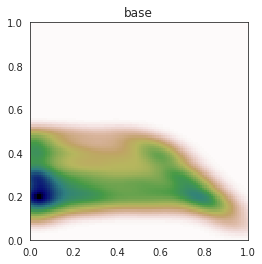

In [9]:
segment_generator = SegmentGeneratorKDE()
segment_generator.fit("base", test_data)
for action, kernel in segment_generator.kernels.items():
    X, Y = np.mgrid[0:1:100j, 0:1:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = np.reshape(kernel(positions).T, X.shape)
    plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[0, 1, 0, 1])
    plt.title(action)
    plt.show()

In [16]:
result_human = pkl.load(open("reports/outputs/performance/charade-sta/representative_human.pkl", "rb"))
sub_test_data = []
for query, _, _, _ in result_human:
    for gt_instance in test_data:
        if gt_instance[0] == query:
            sub_test_data.append(gt_instance)
            break
len(sub_test_data)            

300

top-30 actions cover 93.5% of all actions


Text(0.7, 0.8, 'Charade-STA')

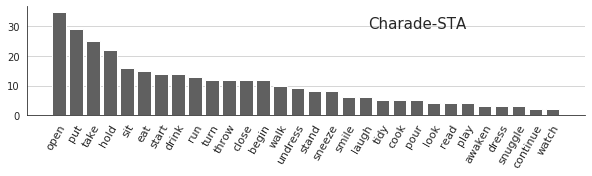

In [17]:
sentences = [query[1] for query, _ in sub_test_data]
simplified_sentences = get_key_tokens(sentences)

verbs = sum([x[0] for x in simplified_sentences], [])
verb_c = Counter(verbs)
k = 30

counts = [v for _, v in verb_c.most_common(k)]
top_actions = [k for k, _ in verb_c.most_common(k)]
sns.set_style("white")
plt.figure(figsize=(10, 2))
plt.bar(range(len(counts)), counts, color="#606060")
_ = plt.xticks(np.arange(len(counts))+.5, top_actions, rotation=60, fontsize=11, ha="right")
# plt.title(f"Top-{k} verb vocabulary")
sns.despine()
print(f"top-{k} actions cover {sum(counts)/sum(verb_c.values())*100:.1f}% of all actions")
plt.gca().yaxis.grid()
plt.text(0.7, 0.8, "Charade-STA", fontsize=15, transform=plt.gca().transAxes, ha="center")

#instances: 300


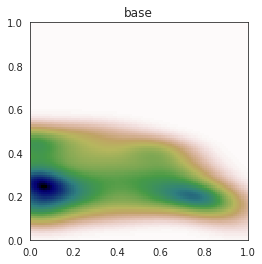

In [18]:
segment_generator = SegmentGeneratorKDE()
segment_generator.fit("base", sub_test_data)
for action, kernel in segment_generator.kernels.items():
    X, Y = np.mgrid[0:1:100j, 0:1:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = np.reshape(kernel(positions).T, X.shape)
    plt.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[0, 1, 0, 1])
    plt.title(action)
    plt.show()

In [19]:
len(test_data)

3720